In [30]:
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import coremltools # to save model for ios device

In [31]:
bodyParts = {
    "nose": 0, 
    "leftEar": 1,
    "leftEye": 2,
    "leftAnkle": 3,
    "leftElbow": 4,
    "leftWrist": 5,
    "leftKnee": 6,
    "leftShoulder": 7,
    "leftHip": 8,
    "neck": 9,
    "rightEar": 10,
    "rightEye": 11,
    "rightAnkle": 12,
    "rightElbow": 13,
    "rightWrist": 14,
    "rightKnee": 15,
    "rightShoulder": 16,
    "rightHip": 17,
    "root": 18,
}

# real human skeleton graph

anotomicSkeleton = [
    ["nose", "leftEar"], 
    ["nose", "rightEar"],
    ["nose", "leftEye"],
    ["nose", "rightEye"],
    ["nose", "neck"],
    ["neck", "leftShoulder"],
    ["leftShoulder", "leftElbow"],
    ["leftElbow", "leftWrist"],
    ["neck", "rightShoulder"],
    ["rightShoulder", "rightElbow"],
    ["rightElbow", "rightWrist"],
    ["leftShoulder", "leftHip"],
    ["neck", "root"],
    ["root", "leftHip"],
    ["root", "rightHip"],
    ["rightShoulder", "rightHip"],
    ["leftHip", "leftKnee"],
    ["leftKnee", "leftAnkle"],
    ["rightHip", "rightKnee"],
    ["rightKnee", "rightAnkle"]
]

dataSetNaming = [
    "x_nose", "y_nose",
    "x_leftEar", "y_leftEar",
    "x_leftEye", "y_leftEye",
    "x_leftAnkle", "y_leftAnkle",
    "x_leftElbow", "y_leftElbow",
    "x_leftWrist", "y_leftWrist",
    "x_leftKnee", "y_leftKnee",
    "x_leftShoulder", "y_leftShoulder",
    "x_leftHip", "y_leftHip",
    "x_neck", "y_neck",
    "x_rightEar", "y_rightEar",
    "x_rightEye", "y_rightEye",
    "x_rightAnkle", "y_rightAnkle",
    "x_rightElbow", "y_rightElbow",
    "x_rightWrist", "y_rightWrist",
    "x_rightKnee", "y_rightKnee",
    "x_rightShoulder","y_rightShoulder",
    "x_rightHip", "y_rightHip",
    "x_root", "y_root"
]

In [32]:
# functions

def createSkeleton(rawData):
    skeletons = []
    for rawSkeleton in rawData:  
        skeleton = []
        for i in range(int(len(rawSkeleton) / 2)):
            skeleton.append((rawSkeleton[i * 2], rawSkeleton[i * 2 + 1]))
        skeletons.append(skeleton) 
    
    return skeletons

# read DataFrom file

def createRawData(path):
    data = open(path, 'r')
    dataSet = []
    for line in data:
        strippedLine = line.strip()
        try:
            rawSkeleton = list(map(float, strippedLine.split()))
        except:
            continue
        dataSet.append(rawSkeleton)
    return dataSet

# data to learn model, a root as 0,0 in сartesian coordinate system

def createDataFromSkeleton(skeleton):
    data = []
    
    x_root = skeleton[bodyParts["root"]][0]
    y_root = skeleton[bodyParts["root"]][1]
    
    for joint in skeleton:
        data.append(joint[0] - x_root)
        data.append(joint[1] - y_root)
    return data

def createDatasetFromSkeletons(skeletons):
    dataset = []
    for skeleton in skeletons:
        dataset.append(createDataFromSkeleton(skeleton))
    return dataset
        
# plots
    
def drawSkeletons(skeletons):
    fig = plt.figure()
    for skeleton in skeletons:
        for bone in anotomicSkeleton:
            plt.plot([skeleton[bodyParts[bone[0]]][0], skeleton[bodyParts[bone[1]]][0]], [skeleton[bodyParts[bone[0]]][1], skeleton[bodyParts[bone[1]]][1]], color="green")
    fig.set_size_inches(8, 18)
    plt.show()
    
def drawSkeleton(skeleton):
    fig = plt.figure()
    for bone in anotomicSkeleton:
        plt.plot([skeleton[bodyParts[bone[0]]][0], skeleton[bodyParts[bone[1]]][0]], [skeleton[bodyParts[bone[0]]][1], skeleton[bodyParts[bone[1]]][1]], color="green")
    fig.set_size_inches(8, 18)
    plt.show()
    
# squats counter logic

def squatsAccuracy(correct ,predicted):
    cnt = 0
    for i in range(len(correct)):
        if correct[i] != predicted[i]:
            cnt += 1
    return 100.0 - cnt / len(correct)
    
def squatsAmount(arr):
    amount = 0
    cnt = 0
    for i in arr: 
        if i == 0:
            cnt+=1
        else:
            if cnt > 5:
                amount+=1
            cnt = 0
    return amount

In [33]:
rawSeatData = createRawData("/Users/dimazzzik/Desktop/VisionData/DimaSeat.txt")
rawStandData = createRawData("/Users/dimazzzik/Desktop/VisionData/DimaStand.txt")
rawOneSquatData = createRawData("/Users/dimazzzik/Desktop/VisionData/DimaOneSquat.txt")

seatData = createSkeleton(rawSeatData)
standData = createSkeleton(rawStandData)
oneSquatData = createSkeleton(rawOneSquatData)

In [34]:
print(len(rawSeatData), len(rawStandData))

847 1773


<Figure size 432x288 with 0 Axes>

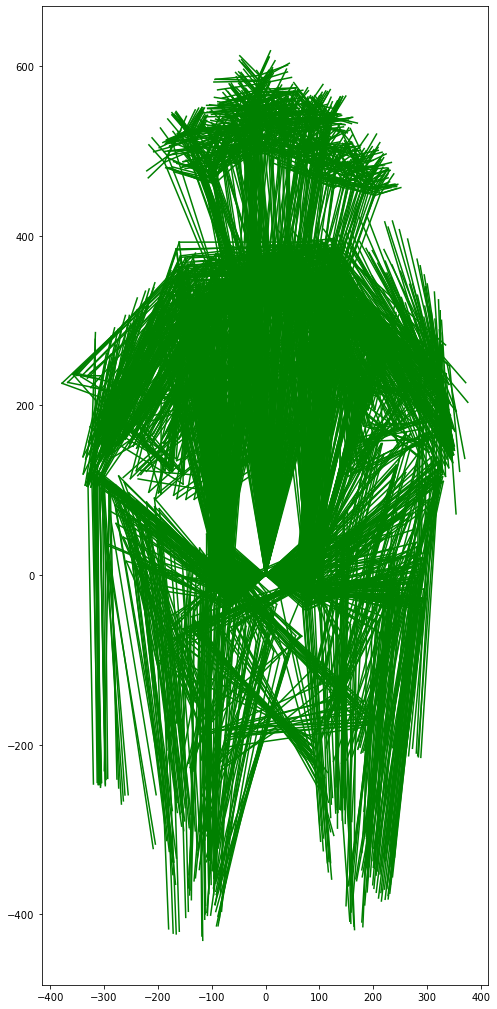

In [35]:
fig = plt.figure()
drawSkeletons(createSkeleton(createDatasetFromSkeletons(seatData[500:700])))

<Figure size 432x288 with 0 Axes>

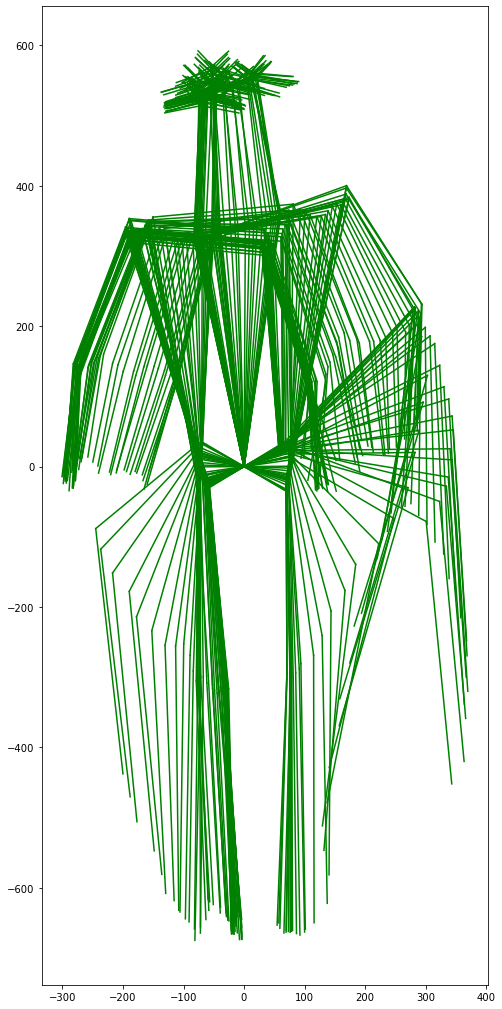

In [36]:
fig = plt.figure()
drawSkeletons(createSkeleton(createDatasetFromSkeletons(standData[1500:1550])))

<Figure size 432x288 with 0 Axes>

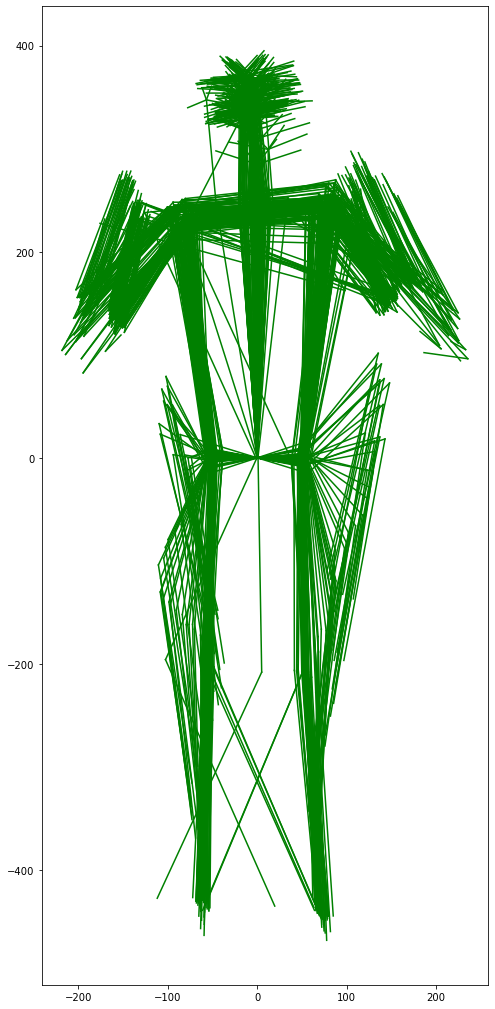

In [37]:
fig = plt.figure()
drawSkeletons(createSkeleton(createDatasetFromSkeletons(oneSquatData)))

сидит 0 
стоит 1



In [38]:
X = createDatasetFromSkeletons(seatData + standData)
y = ["seat"] * len(seatData) + ["stand"] * len(standData)
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=1)

In [39]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test) 

/Users/dimazzzik/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [40]:
print("Accuracy:", squatsAccuracy(y_test, predicted))

Accuracy: 100.0


In [42]:
coreml_model = coremltools.converters.sklearn.convert(clf, dataSetNaming, ["poseClass", "poseProbabilities"])
coreml_model.save('SquatPoseRecognizerModel.mlmodel')